### Use Log Exploration / Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd

import data_manipulation as dm
import time
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#memb = members()
#txn= transactions()
#tr = train()
#ul = user_logs()

In [3]:
"""
ul[ul['total_secs']<0].head()
ul['total_secs'].describe()
ul['num_25'].describe()
ul['num_50'].describe()
ul['num_75'].describe()
ul['num_985'].describe()
ul['num_100'].describe()
ul['num_unq'].describe()

print ('total nulls for total_secs: %s' %(len(ul[pd.isnull(ul['total_secs'])==True])))
print ('total nulls for num_25: %s' %(len(ul[pd.isnull(ul['num_25'])==True])))
print ('total nulls for num_50: %s' %(len(ul[pd.isnull(ul['num_50'])==True])))
print ('total nulls for num_75: %s' %(len(ul[pd.isnull(ul['num_75'])==True])))
print ('total nulls for num_985: %s' %(len(ul[pd.isnull(ul['num_985'])==True])))
print ('total nulls for num_100: %s' %(len(ul[pd.isnull(ul['num_100'])==True])))
print ('total nulls for num_unq: %s' %(len(ul[pd.isnull(ul['num_unq'])==True])))

ul['total_secs'].quantile(0.985)

ul['secs_capped'] = ul['total_secs'].clip(lower = 0, upper = ul['total_secs'].quantile(0.985))
ul['secs_capped'].describe()
sns.boxplot(ul['secs_capped'], color='green')
""";

## Working with pivoted data - Monthly Median Seconds

In [4]:
tmonths = pd.read_csv('../ul_tsecs_month_median.csv')
tmonths.index = tmonths['new_id']
tmonths.drop('new_id', axis = 1, inplace = True)

In [5]:
tmonths.head()

,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,...,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702
new_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9458.743164,8848.764648,5218.155273,5777.734863
1,1365.864014,1606.192505,1392.989014,2171.500977,1703.237061,519.583984,1113.900024,1287.750000,12318.168945,8976.209961,...,7495.960449,3839.764893,2947.850098,5203.181641,5629.649414,3446.433105,2874.422119,3405.732910,4234.472168,5254.327637
2,22206.810547,23066.966797,24130.902344,19438.591797,15904.586914,9551.157227,6473.262695,4217.624512,5287.693848,2130.865967,...,9285.039062,8051.573242,3987.885254,2672.850098,4209.827148,10438.706055,13468.336914,5199.554688,6759.840820,4291.464355
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2876.663086,2880.809082,2255.391113,1648.351074,4744.333984,4878.411133,4194.295898,3999.538086,3125.753906,2044.843018
4,2650.747070,4130.661133,2326.889893,1573.488037,1390.033447,1826.531982,3125.766602,1454.121948,3565.230957,2896.437500,...,2266.287109,1730.220947,1730.208984,1580.969971,1392.484009,1645.520508,1285.255981,2287.674805,1493.439941,1373.794434


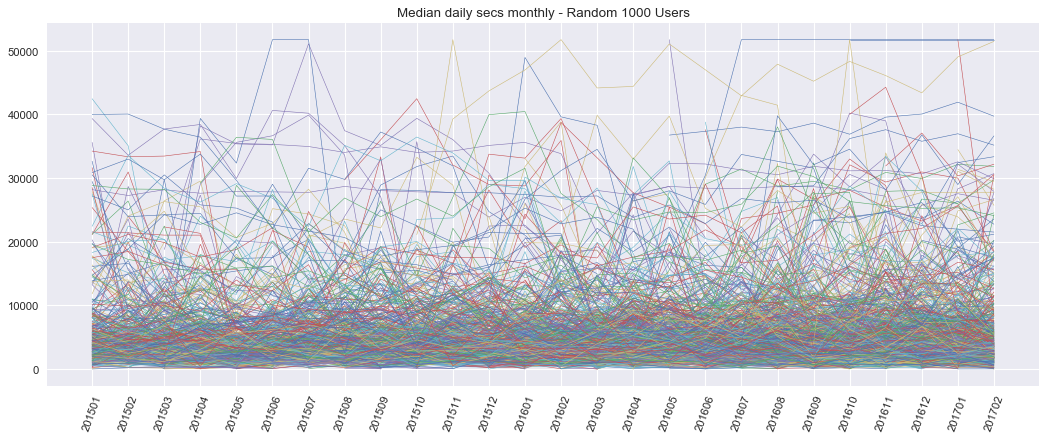

In [6]:
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

user_count = 1000

for i in range(user_count):
    x = tmonths.loc[np.random.choice(tmonths.index, 1), :].values.reshape(26,1)
    plt.plot(x, lw=0.5)

plt.xticks(range(26),tmonths.columns.values, rotation=70)
plt.title('Median daily secs monthly - Random {} Users'.format(user_count));

/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


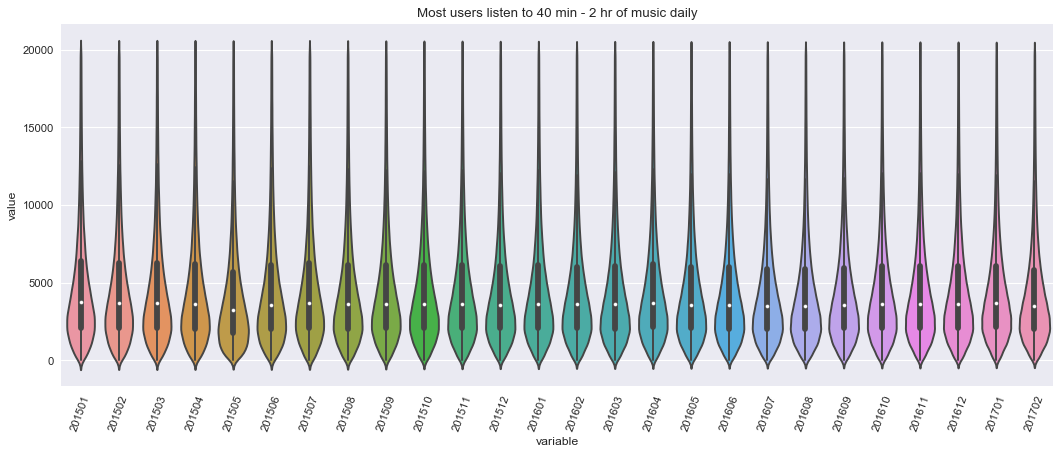

In [7]:
tmonths_melted = pd.melt(tmonths)
tmonths_melted = tmonths_melted[tmonths_melted['value'] < 20000]
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(tmonths_melted['variable'], tmonths_melted['value'])
plt.xticks(range(26),tmonths.columns.values, rotation=70);
plt.title('Most users listen to 40 min - 2 hr of music daily')

In [8]:
## Normalize data?
#tmonths_masked = np.ma.array(tmonths, mask=np.isnan(tmonths))
#x_norm = np.linalg.norm(tmonths_masked, axis = 1, keepdims = True)

## Working with pivoted data - Monthly Sum Seconds

In [56]:
sum_months = pd.read_csv('../ul_tsecs_month.csv')
sum_months.index = sum_months['new_id']
sum_months.drop('new_id', axis = 1, inplace = True)

sum_months.head()

,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,...,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702
new_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,148668.078125,256812.000000,157868.671875,156533.953125
1,22478.437500,48230.347656,21394.044922,46322.765625,30584.423828,11007.208008,16073.696289,13551.139648,354358.812500,358967.375000,...,299499.718750,145388.687500,120546.710938,185178.171875,173410.828125,190726.328125,133337.859375,154978.390625,198105.281250,189007.843750
2,672000.187500,765858.625000,658700.437500,580720.750000,495664.406250,343292.593750,342848.812500,163926.500000,180656.796875,80795.156250,...,250853.734375,119655.804688,48377.679688,71353.929688,118208.531250,152259.281250,288671.937500,169086.593750,215757.140625,123768.835938
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101241.804688,168964.171875,55151.828125,41712.925781,204505.375000,142246.781250,129382.882812,132765.531250,106043.140625,78863.187500
4,35106.351562,145239.312500,101912.406250,42343.816406,43177.894531,33320.484375,86379.890625,31821.871094,62189.585938,56927.460938,...,74290.648438,52577.769531,46481.828125,39885.625000,39443.375000,42208.777344,29430.154297,54255.660156,51758.312500,49219.148438


/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


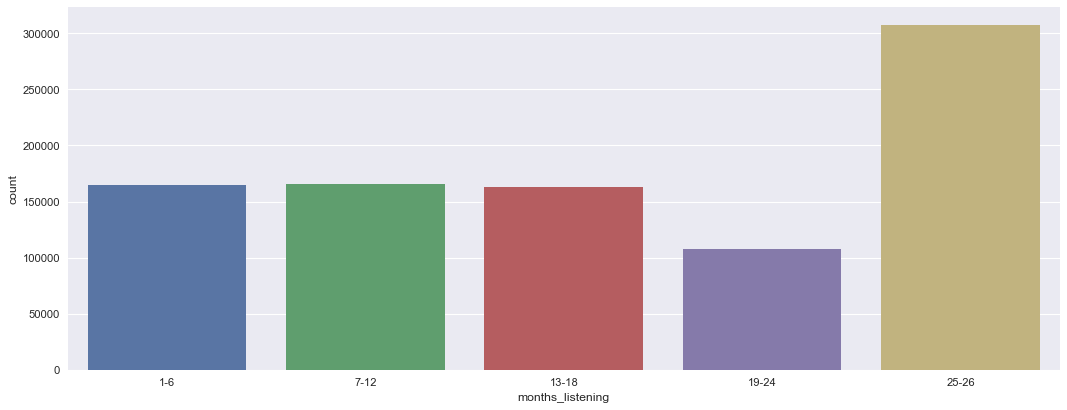

In [57]:
## add a column to calculate months of user_log data (not necessarily consecutive)
sum_months['p26'] = np.count_nonzero(sum_months.fillna(0), axis = 1)

sum_months['months_listening'] = pd.cut(sum_months['p26'], [1,6,12,18,24,30], labels=['0-6','7-12','13-18','19-24','25-26'])
#print (sum_months['non_null'].head())

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(sum_months['months_listening'])

/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


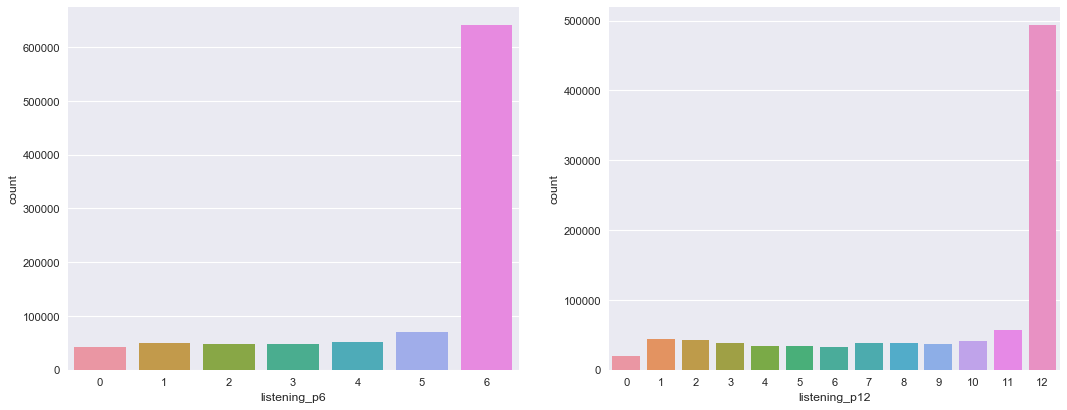

In [68]:
### calculate months with song data in past 6 and 12 months
sum_months['listening_p6'] = np.count_nonzero(sum_months[['201702','201701','201612','201611','201610','201609']].fillna(0), axis = 1)
sum_months['listening_p12'] = np.count_nonzero(sum_months[['201702','201701','201612','201611','201610','201609',
                                                          '201608','201607','201606','201605','201604','201603']].fillna(0), axis = 1)

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
sns.countplot(sum_months['listening_p6'])
plt.subplot(1,2,2)
sns.countplot(sum_months['listening_p12'])

/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


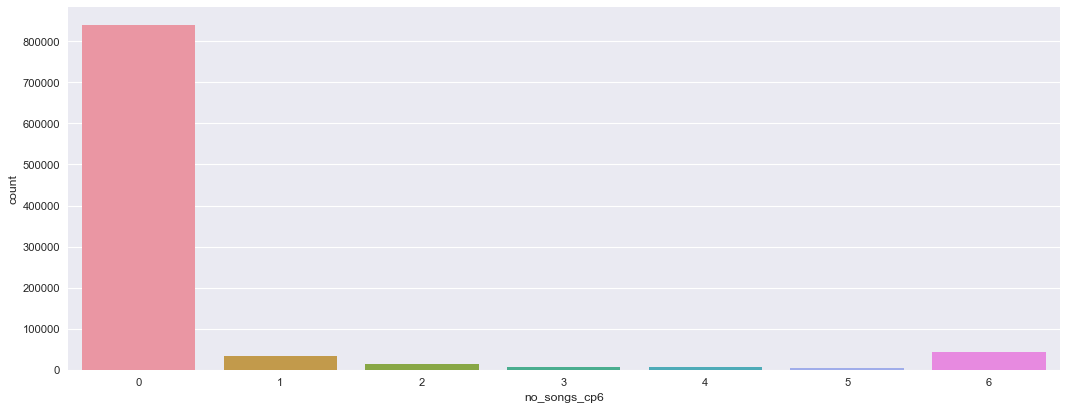

In [69]:
### calculate descending consecutive months with no log data (no songs consecutive previous 6 months, or no_songs_cp6)

no_songs = []
for id in np.unique(sum_months.index.values):
    total_months = 0
    if np.isnan(sum_months.loc[id, '201702']):
        total_months += 1
        if np.isnan(sum_months.loc[id, '201701']):
            total_months += 1
            if np.isnan(sum_months.loc[id, '201612']):
                total_months += 1
                if np.isnan(sum_months.loc[id, '201611']):
                    total_months += 1
                    if np.isnan(sum_months.loc[id, '201610']):
                        total_months += 1
                        if np.isnan(sum_months.loc[id, '201609']):
                            total_months += 1
    no_songs.append(total_months)

sum_months['no_songs_cp6'] = no_songs

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(sum_months['no_songs_cp6'])

<span style="color:blue"> <i>Only few people had from 1-6 consecutive months without listening data. Interesting to see how they relate to churn and what kind of subscribers they are (monthly, yearly). Those two pieces in combination could be very valuable </i></span>

## Test some clusters on median seconds monthly

In [9]:
##In order to test some clusters need to replace NAs, with 0 in this case.
tmonths.fillna(0, inplace = True)
from sklearn.cluster import KMeans

Clusters: 3


/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


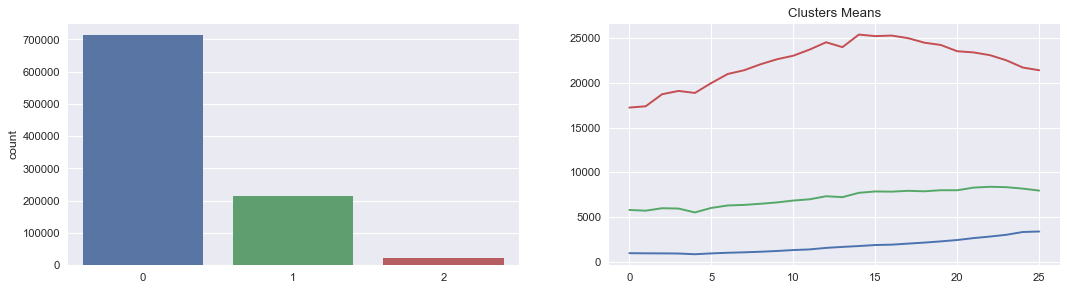

Clusters: 4


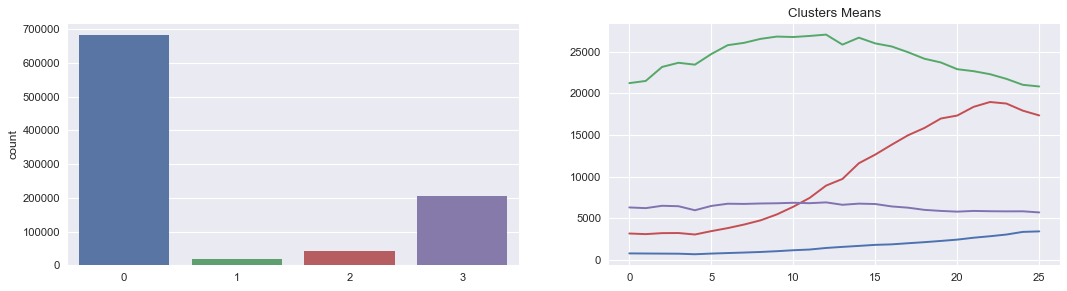

Clusters: 5


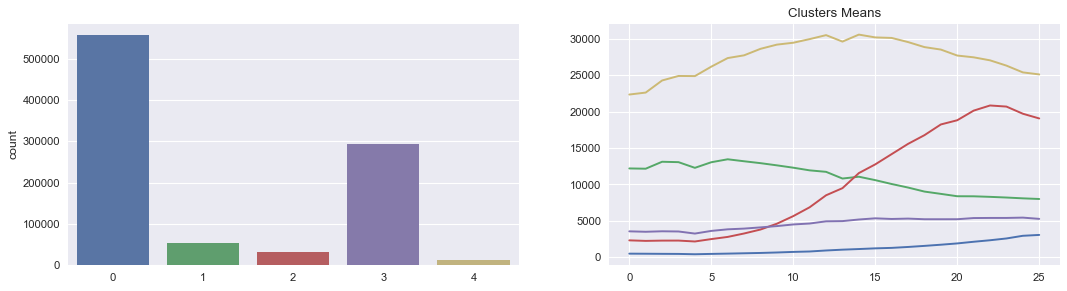

Clusters: 6


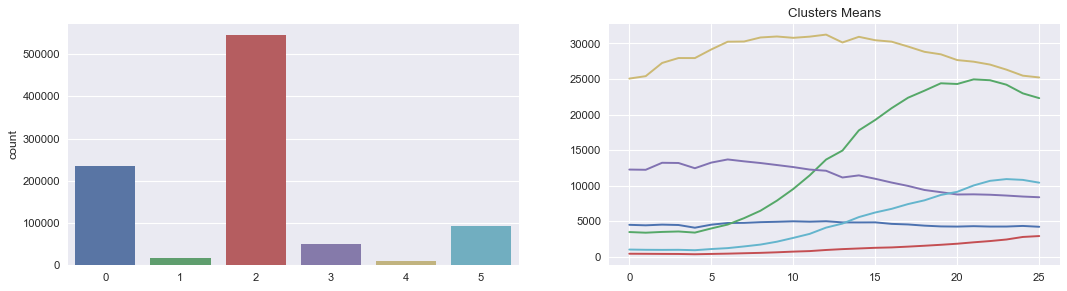

Clusters: 7


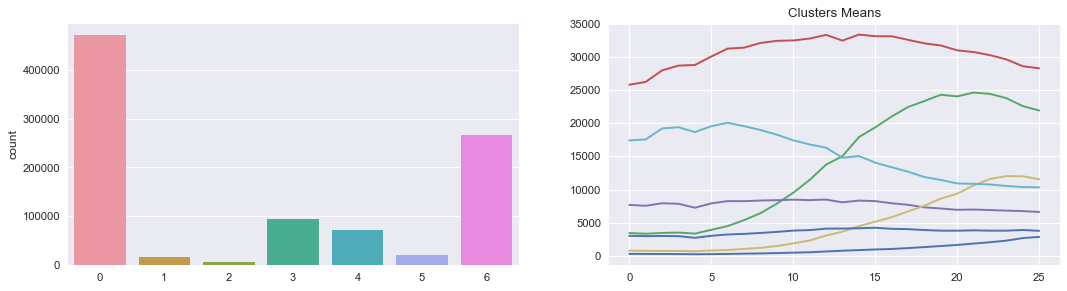

Clusters: 8


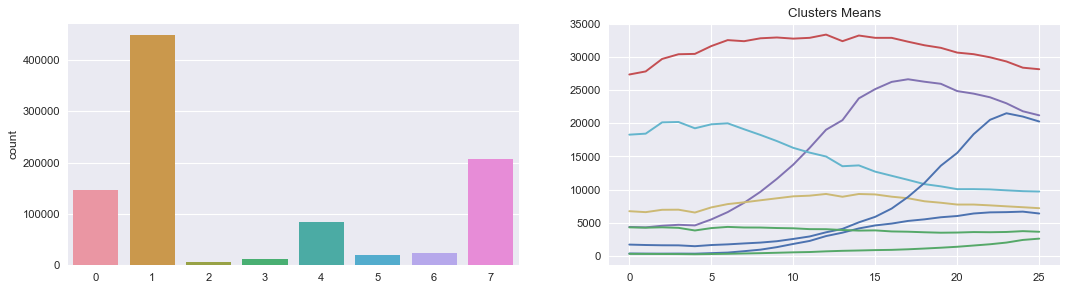

Clusters: 9


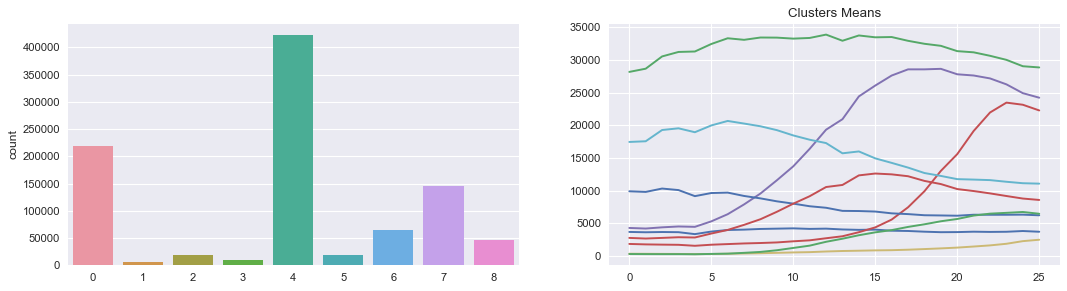

In [10]:
sclusters = [3,4,5,6,7,8,9]

for scluster in sclusters:
    kmeans = KMeans(n_clusters=scluster, random_state=0).fit(tmonths)

    plt.figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
    print ('Clusters: {}'.format(scluster))
    plt.subplot(1,2,1)
    sns.countplot(kmeans.labels_)

    plt.subplot(1,2,2)
    plt.title('Clusters Means')
    plt.plot(kmeans.cluster_centers_.T);
    plt.show()

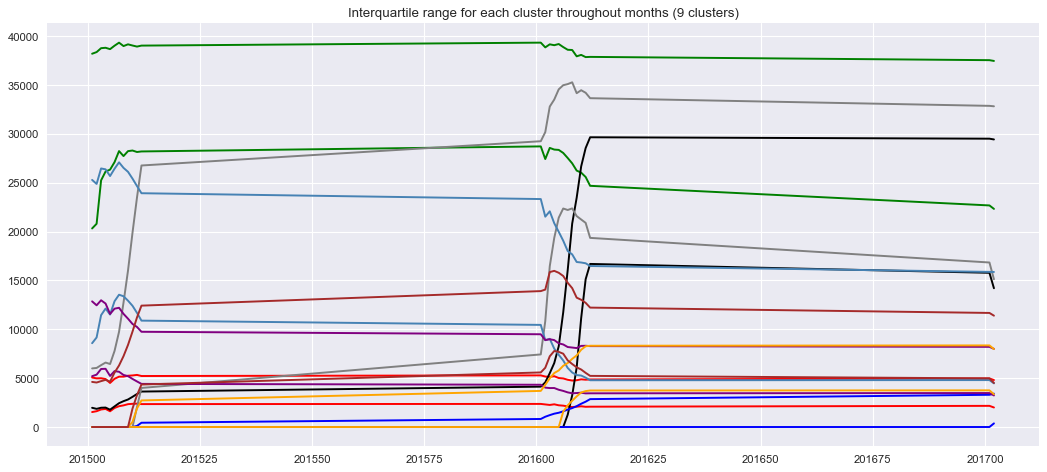

In [11]:
tmonths_c9 = tmonths
tmonths_c9['cluster'] = kmeans.labels_

colors = ['red','green','black','grey', 'blue', 'steelblue', 'purple', 'orange', 'brown']
counter = 0
plt.figure(num=None, figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
for cluster in np.unique(kmeans.labels_):
    plt.plot(tmonths_c9[tmonths_c9['cluster'] == cluster].drop('cluster', axis = 1).quantile(0.25), color = colors[counter]);
    plt.plot(tmonths_c9[tmonths_c9['cluster'] == cluster].drop('cluster', axis = 1).quantile(0.75), color = colors[counter]);
    counter += 1
    
plt.title('Interquartile range for each cluster throughout months ({0} clusters)'.format(counter))
plt.show()

##very hard to see, but very informative chart. Lots of overlaps and massive distances in the interquartile ranges.
##this <might> point to poorly separated clusters. Perhaps graph with heatmap